<a href="https://colab.research.google.com/github/hoangminh303/do_an_cac_thuat_toan_toi_uu/blob/main/GD_hqttdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("https://raw.githubusercontent.com/hoangminh303/do_an_cac_thuat_toan_toi_uu/main/data.csv")

In [43]:
df = pd.DataFrame(data)
df = df.drop_duplicates().reset_index(drop=True)
df = df.dropna().reset_index(drop=True)

In [44]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [46]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [78]:
die_df = df[df["Status"] == "Developed"]

Text(0, 0.5, 'Life expectancy')

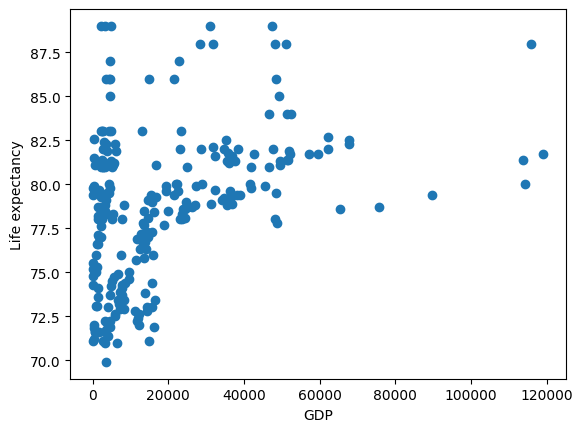

In [79]:
plt.scatter(die_df["GDP"], die_df["Life expectancy "])
plt.xlabel("GDP")
plt.ylabel("Life expectancy")

In [ ]:
Q1 = die_df["GDP"].quantile(0.25)
Q3 = die_df["GDP"].quantile(0.75)
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR
lower_threshold = Q1 - 1.5 * IQR

Text(0, 0.5, 'Life expectancy (filtered)')

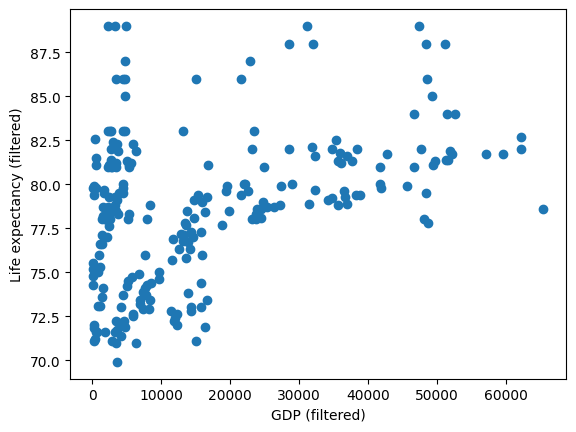

In [80]:
filtered_df = die_df[(die_df["GDP"] >= lower_threshold) & (die_df["GDP"] <= upper_threshold)]
plt.scatter(filtered_df["GDP"], filtered_df["Life expectancy "])
plt.xlabel("GDP (filtered)")
plt.ylabel("Life expectancy (filtered)")

In [51]:
X, y = filtered_df["GDP"].values.reshape(-1, 1), filtered_df["Life expectancy "].values
X = (X-X.min())/(X.max()-X.min())
y = (y-y.min())/(y.max()-y.min())

Text(0, 0.5, 'Life expectancy (normalized)')

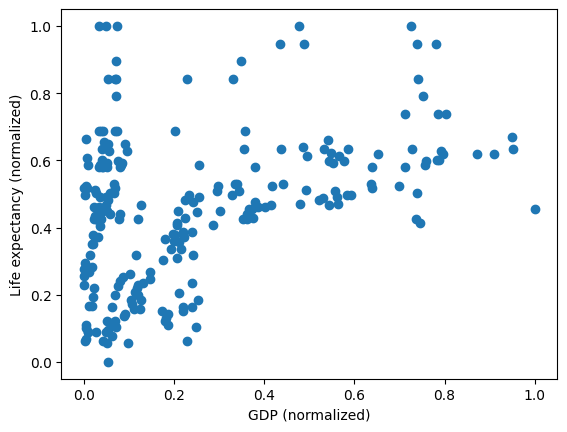

In [81]:
plt.scatter(X, y)
plt.xlabel("GDP (normalized)")
plt.ylabel("Life expectancy (normalized)")

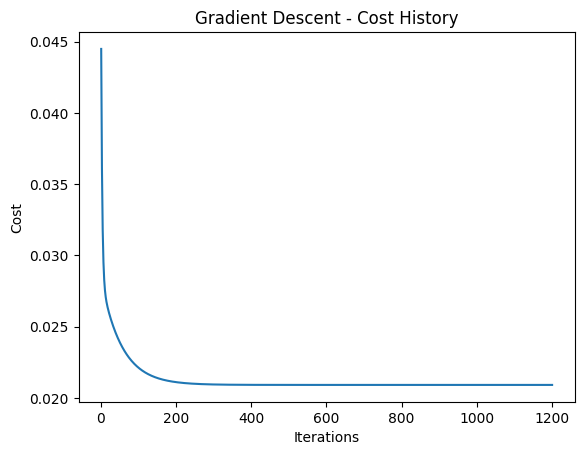

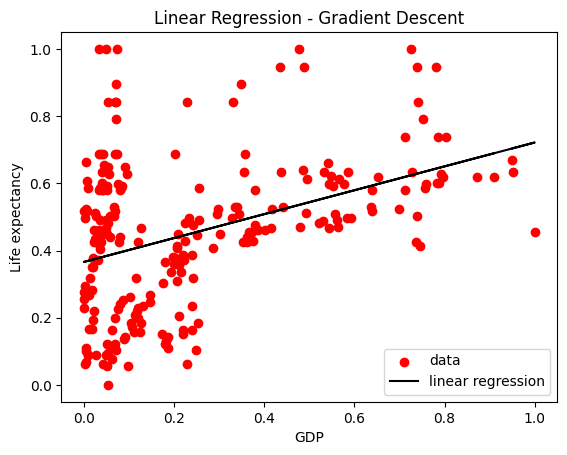

In [83]:
m = len(X)
learning_rate = 0.15

x = np.c_[np.ones(m), X]

theta = np.random.rand(2)

def hypothesis(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y
        gradient = X.T.dot(error) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

num_iterations = 1200
theta_final, cost_history = gradient_descent(x, y, theta, learning_rate, num_iterations)

plt.plot(range(1, num_iterations+1), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent - Cost History")
plt.show()

plt.scatter(X, y, color="red", label="data")
plt.plot(X, hypothesis(x, theta_final), color="black", label="linear regression")
plt.xlabel("GDP")
plt.ylabel("Life expectancy")
plt.title("Linear Regression - Gradient Descent")
plt.legend()
plt.show()

In [84]:
theta_final

array([0.36599023, 0.35555003])